### CIFAR10 : Multilayer networks and autoencoder

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from tqdm import tqdm_notebook
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings("ignore")

### Task 1:
One should do fucntion, which accept tensor 28*28 and plot it

In [2]:
def show_tensor_image(torch_tensor):
  plt.imshow(torch_tensor, cmap = 'viridis')
  plt.show()

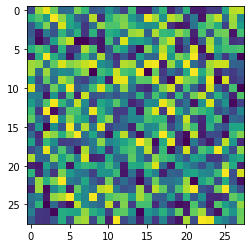

In [3]:
show_tensor_image(torch.rand([28,28])) ## check the fucntion

### Task 2. 
Upload the dataset

In [4]:
dataset = torchvision.datasets.CIFAR10(root = "./data",train = True, download = True)
testset = torchvision.datasets.CIFAR10(root = "./data",train = False, download = True)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
img, lab = dataset.__getitem__(0)
img, lab, type(img)

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF747A19198>,
 6,
 PIL.Image.Image)

In [6]:
trans_tensor = transforms.ToTensor()
tensor_of_image = trans_tensor(img)
tensor_of_image.shape, tensor_of_image[0]

(torch.Size([3, 32, 32]),
 tensor([[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]]))

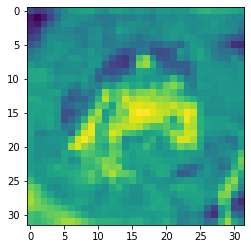

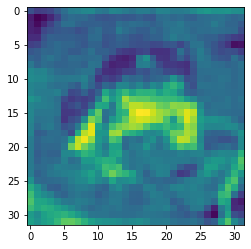

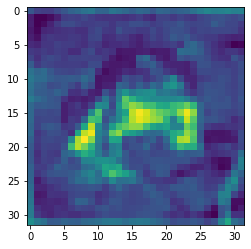

(None, None, None)

In [7]:
trans_tensor = transforms.ToTensor()
show_tensor_image(trans_tensor(img)[0]),show_tensor_image(trans_tensor(img)[1]),show_tensor_image(trans_tensor(img)[2])
## cannot show_tensor_image(trans_tensor(img))

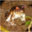

In [8]:
img

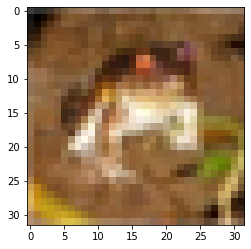

In [9]:
trans_PIL = transforms.ToPILImage()
trans_tensor = transforms.ToTensor()
show_tensor_image(trans_PIL(trans_tensor(img)))


В результате загрузки датасетов при помощи пакета torchvision мы получим картинки, содержащие значения в диапазоне [0,1], чтобы подавать их в нейросеть, нам нужно сделать из них тензоры со значениями в диапазоне [-1,1]

Можно в ручную , как кодом ниже

In [10]:
trans_tensor(img)[0]

tensor([[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
        [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
        [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
        ...,
        [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
        [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
        [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]])

In [11]:
result = (trans_tensor(img)[0] - 0.5)/0.5
result

tensor([[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
        [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
        [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
        ...,
        [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
        [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
        [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]])

In [13]:
norm_trans = transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
norm_trans(trans_tensor(img))[0]

tensor([[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
        [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
        [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
        ...,
        [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
        [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
        [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]])

As one can see, we can make transforms.Normalization instead of the (img - 0.5)/0.5

In [14]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [114]:
dataset = torchvision.datasets.CIFAR10(root = "./data",train = True, download = True,transform = transform)
testset = torchvision.datasets.CIFAR10(root = "./data",train = False, download = True,transform = transform )
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle=True,num_workers = 0, pin_memory = False )
validation_loader = torch.utils.data.DataLoader(testset,batch_size = 32, shuffle = False, num_workers =0 , pin_memory = False)

Files already downloaded and verified
Files already downloaded and verified


In [98]:
dataset.__len__(), testset.__len__()

(50000, 10000)

In [99]:
# достаем случайные картинки из обучающей выборки
data_iter = iter(train_loader)
img,lab = data_iter.next()
img.shape, type(img) # batch of images

(torch.Size([4, 3, 32, 32]), torch.Tensor)

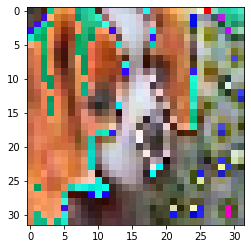

In [101]:
show_tensor_image(trans_PIL(img[3]))

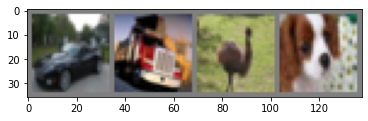

In [102]:
def clear_imshow(img):
    img = img / 2 + 0.5     # денормировка
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
clear_imshow(torchvision.utils.make_grid(img))

### TASK 3:
Create the neural network for this problem

In [103]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
COLOR_CHANNELS = 3
EPOCHS = 50
LEARNING_RATE = 0.001
BATCH_SIZE = 32
BATCH_IMAGE_COUNT = 10000
CLASSES = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
N_CLASSES = len(CLASSES)
PLOT = False

In [104]:
class Net(nn.Module):
  def __init__(self,n_hidden_nodes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(IMAGE_WIDTH*IMAGE_WIDTH*COLOR_CHANNELS, n_hidden_nodes)
    self.out = nn.Linear(n_hidden_nodes,N_CLASSES)
  def forward(self,x):
    x = x.view(-1,IMAGE_WIDTH * IMAGE_WIDTH * COLOR_CHANNELS)
    sigmoid = torch.nn.Sigmoid()
    x = sigmoid(self.fc1(x))
    x = F.log_softmax(self.out(x))
    return x

### Task 4:
Create the Train and Evaluate methods

In [105]:
def get_cross_entropy(values, values_pred):
  return F.nll_loss(values,values_pred)

In [125]:
def train(epoch, model, train_loader, optimizer, log_interval=100, cuda=None):
  model.train()
  correct = 0
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)

    pred = output.data.max(1)[1] # get the index of the max log-probability
    correct += pred.eq(target.data).cpu().sum()
    accuracy = 100. * correct / len(train_loader.dataset)
        
        
    loss = torch.nn.functional.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10000 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item(), accuracy))

In [118]:
def validate(loss_vector, accuracy_vector, model, validation_loader, cuda=None):
  model.eval()
  val_loss, correct = 0, 0
  for data, target in validation_loader:
   
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    val_loss += torch.nn.functional.nll_loss(output, target).item()
    pred = output.data.max(1)[1] # get the index of the max log-probability
    correct += pred.eq(target.data).cpu().sum()

  val_loss /= len(validation_loader)
  loss_vector.append(val_loss)

  accuracy = 100. * correct / len(validation_loader.dataset)
  accuracy_vector.append(accuracy)

  print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      val_loss, correct, len(validation_loader.dataset), accuracy))

In [126]:
hidden_nodes = 10
layers = 1
model = Net(hidden_nodes)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
loss_vector = []
acc_vector = []
for epoch in range(1, EPOCHS + 1):
  train(epoch, model, train_loader, optimizer)
  validate(loss_vector, acc_vector, model, validation_loader)
  if epoch == 40:
      break

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.299684

Validation set: Average loss: 2.2453, Accuracy: 1923/10000 (19%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.275990

Validation set: Average loss: 2.2077, Accuracy: 2206/10000 (22%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 2.176100

Validation set: Average loss: 2.1789, Accuracy: 2373/10000 (24%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 2.174095

Validation set: Average loss: 2.1540, Accuracy: 2490/10000 (25%)

Train Epoch: 5 [0/50000 (0%)]	Loss: 2.181161

Validation set: Average loss: 2.1319, Accuracy: 2606/10000 (26%)

Train Epoch: 6 [0/50000 (0%)]	Loss: 2.116617

Validation set: Average loss: 2.1117, Accuracy: 2669/10000 (27%)

Train Epoch: 7 [0/50000 (0%)]	Loss: 2.083330

Validation set: Average loss: 2.0932, Accuracy: 2712/10000 (27%)

Train Epoch: 8 [0/50000 (0%)]	Loss: 2.049271

Validation set: Average loss: 2.0761, Accuracy: 2762/10000 (28%)

Train Epoch: 9 [0/50000 (0%)]	Loss: 2.072252

Validation set: Average loss: 2.0603, Accuracy: 2804/10000

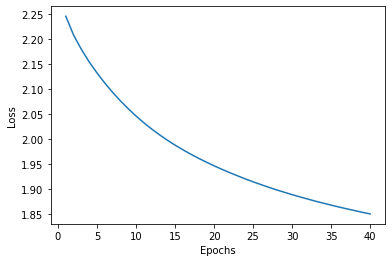

In [127]:
# Plot train loss and validation accuracy vs epochs for each learning rate
epochs = [i for i in range(1, 41)]
plt.plot(epochs, loss_vector)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()